In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
file = "Datasets/mental_disorders_dataset.csv"

In [3]:
df = pd.read_csv(file)
print(df.head())

  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO        

In [4]:
df.dtypes

Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

In [5]:
df.columns

Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [6]:
for each in df.columns:
    print(each.upper())
    print(df[each].unique())
    print('-'*15)

PATIENT NUMBER
['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patiant

In [7]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.strip()
print(df['Suicidal thoughts'].unique())

['YES' 'NO']


Test Regex

In [8]:
pattern = r"Patiant-([0-9]+)"
name = 'Patiant-01'
res = re.search(pattern, name)
print(res.groups())
# patient_no = res.groups()[1]

('01',)


In [9]:
df['Patient Number']

0       Patiant-01
1       Patiant-02
2       Patiant-03
3       Patiant-04
4       Patiant-05
          ...     
115    Patiant-116
116    Patiant-117
117    Patiant-118
118    Patiant-119
119    Patiant-120
Name: Patient Number, Length: 120, dtype: object

In [10]:
pattern = r"Patiant-([0-9]+)"
d = df['Patient Number'].str.extract(pattern)
print(d)

       0
0     01
1     02
2     03
3     04
4     05
..   ...
115  116
116  117
117  118
118  119
119  120

[120 rows x 1 columns]


In [11]:
df['patient_no'] = df['Patient Number'].str.extract(pattern)

In [12]:
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [13]:
rating_pattern = r"([0-9])+ From 10"
r = df['Sexual Activity'].str.extract(rating_pattern)
print(r)

     0
0    3
1    4
2    6
3    3
4    5
..  ..
115  2
116  6
117  1
118  7
119  7

[120 rows x 1 columns]


In [14]:
df['sexual_activity'] = df['Sexual Activity'].str.extract(rating_pattern)
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [15]:
df['concentration'] = df['Concentration'].str.extract(rating_pattern)
df['optimism'] = df['Optimisim'].str.extract(rating_pattern)
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [16]:
df_test = df['Mood Swing'].copy()
mood_swing = pd.get_dummies(df_test, drop_first=True, prefix='mood_swing', dtype='int')
suicidal_thoughts = pd.get_dummies(df['Suicidal thoughts'], drop_first=True, prefix='suicidal', dtype='int')
anorexia = pd.get_dummies(df['Anorxia'], drop_first=True, prefix='anorexia', dtype='int')

YES no COLUMNS
- MOOD SWING
- SUICIDAL THOUGHTS
- ANORXIA
- AUTHORITY RESPECT
- TRY-EXPLANATION
- AGGRESSIVE RESPONSE
- IGNORE & MOVE-ON
- NERVOUS BREAK-DOWN
- ADMIT MISTAKES
- OVERTHINKING


In [17]:
bool_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
new_name = [x.lower().replace(" ","_") for x in bool_cols]
print(new_name)

['mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect', 'try-explanation', 'aggressive_response', 'ignore_&_move-on', 'nervous_break-down', 'admit_mistakes', 'overthinking']


In [18]:
encoder = LabelEncoder()
for i in range(len(bool_cols)):
    new_col = new_name[i]
    trans_col = bool_cols[i]
    df[new_col] = encoder.fit_transform(df[trans_col])
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [19]:
df_final = df.drop(columns=bool_cols+['Patient Number'])
print(df_final.head())

     Sadness    Euphoric  Exhausted Sleep dissorder Sexual Activity  \
0    Usually      Seldom  Sometimes       Sometimes       3 From 10   
1    Usually      Seldom    Usually       Sometimes       4 From 10   
2  Sometimes  Most-Often  Sometimes       Sometimes       6 From 10   
3    Usually      Seldom    Usually      Most-Often       3 From 10   
4    Usually     Usually  Sometimes       Sometimes       5 From 10   

  Concentration  Optimisim Expert Diagnose patient_no sexual_activity  ...  \
0     3 From 10  4 From 10  Bipolar Type-2         01               3  ...   
1     2 From 10  5 From 10      Depression         02               4  ...   
2     5 From 10  7 From 10  Bipolar Type-1         03               6  ...   
3     2 From 10  2 From 10  Bipolar Type-2         04               3  ...   
4     5 From 10  6 From 10          Normal         05               5  ...   

  mood_swing suicidal_thoughts  anorxia  authority_respect  try-explanation  \
0          1             

In [20]:
print(df_final.dtypes)

Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
patient_no             object
sexual_activity        object
concentration          object
optimism               object
mood_swing              int64
suicidal_thoughts       int64
anorxia                 int64
authority_respect       int64
try-explanation         int64
aggressive_response     int64
ignore_&_move-on        int64
nervous_break-down      int64
admit_mistakes          int64
overthinking            int64
dtype: object


In [21]:
df_final.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose',
       'patient_no', 'sexual_activity', 'concentration', 'optimism',
       'mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect',
       'try-explanation', 'aggressive_response', 'ignore_&_move-on',
       'nervous_break-down', 'admit_mistakes', 'overthinking'],
      dtype='object')

In [22]:
rating_cols = ['Sexual Activity', 'Concentration',  'Optimisim']
df_final = df_final.drop(columns=rating_cols)
df_final.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Expert Diagnose', 'patient_no', 'sexual_activity', 'concentration',
       'optimism', 'mood_swing', 'suicidal_thoughts', 'anorxia',
       'authority_respect', 'try-explanation', 'aggressive_response',
       'ignore_&_move-on', 'nervous_break-down', 'admit_mistakes',
       'overthinking'],
      dtype='object')

In [23]:
df_final[['sexual_activity', 'concentration', 'optimism']].dtypes

sexual_activity    object
concentration      object
optimism           object
dtype: object

In [24]:
df_final[['sexual_activity', 'concentration', 'optimism']].astype('int32').dtypes

sexual_activity    int32
concentration      int32
optimism           int32
dtype: object

In [25]:
df_final.dtypes

Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Expert Diagnose        object
patient_no             object
sexual_activity        object
concentration          object
optimism               object
mood_swing              int64
suicidal_thoughts       int64
anorxia                 int64
authority_respect       int64
try-explanation         int64
aggressive_response     int64
ignore_&_move-on        int64
nervous_break-down      int64
admit_mistakes          int64
overthinking            int64
dtype: object

In [26]:
df_final[['sexual_activity', 'concentration', 'optimism', 'patient_no']] = df_final[['sexual_activity', 'concentration', 'optimism', 'patient_no']].astype('int32')

In [27]:
df_final

,Sadness,Euphoric,Exhausted,Sleep dissorder,Expert Diagnose,patient_no,sexual_activity,concentration,optimism,mood_swing,suicidal_thoughts,anorxia,authority_respect,try-explanation,aggressive_response,ignore_&_move-on,nervous_break-down,admit_mistakes,overthinking
0,Usually,Seldom,Sometimes,Sometimes,Bipolar Type-2,1,3,3,4,1,1,0,0,1,0,0,1,1,1
1,Usually,Seldom,Usually,Sometimes,Depression,2,4,2,5,0,1,0,0,0,0,0,0,0,0
2,Sometimes,Most-Often,Sometimes,Sometimes,Bipolar Type-1,3,6,5,7,1,0,0,0,1,1,0,1,1,0
3,Usually,Seldom,Usually,Most-Often,Bipolar Type-2,4,3,2,2,1,1,1,0,1,0,0,0,0,0
4,Usually,Usually,Sometimes,Sometimes,Normal,5,5,5,6,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,Depression,116,2,5,3,0,1,0,0,1,0,1,0,0,1
116,Sometimes,Sometimes,Sometimes,Seldom,Bipolar Type-1,117,6,7,8,1,0,0,0,0,1,0,0,0,1
117,Usually,Sometimes,Usually,Sometimes,Bipolar Type-2,118,1,5,3,1,0,1,1,0,0,0,1,0,1
118,Usually,Sometimes,Seldom,Seldom,Depression,119,7,7,7,0,1,1,0,1,1,1,0,1,1


In [28]:
df_final = df_final.rename(columns={'sexual_activity':'sexual_activity_rating', 'concentration':'concentration_rating', 'optimism':'optimism_rating'})
df_final.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Expert Diagnose', 'patient_no', 'sexual_activity_rating',
       'concentration_rating', 'optimism_rating', 'mood_swing',
       'suicidal_thoughts', 'anorxia', 'authority_respect', 'try-explanation',
       'aggressive_response', 'ignore_&_move-on', 'nervous_break-down',
       'admit_mistakes', 'overthinking'],
      dtype='object')

In [29]:
df_final.dtypes

Sadness                   object
Euphoric                  object
Exhausted                 object
Sleep dissorder           object
Expert Diagnose           object
patient_no                 int32
sexual_activity_rating     int32
concentration_rating       int32
optimism_rating            int32
mood_swing                 int64
suicidal_thoughts          int64
anorxia                    int64
authority_respect          int64
try-explanation            int64
aggressive_response        int64
ignore_&_move-on           int64
nervous_break-down         int64
admit_mistakes             int64
overthinking               int64
dtype: object

I should have checked dtypes and encoded them before moving on to df_final

In [30]:
df_final[['Sadness','Euphoric','Exhausted','Sleep dissorder']]

,Sadness,Euphoric,Exhausted,Sleep dissorder
0,Usually,Seldom,Sometimes,Sometimes
1,Usually,Seldom,Usually,Sometimes
2,Sometimes,Most-Often,Sometimes,Sometimes
3,Usually,Seldom,Usually,Most-Often
4,Usually,Usually,Sometimes,Sometimes
...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes
116,Sometimes,Sometimes,Sometimes,Seldom
117,Usually,Sometimes,Usually,Sometimes
118,Usually,Sometimes,Seldom,Seldom


In [31]:
for each in ['Sadness','Euphoric','Exhausted','Sleep dissorder']:
    print(each.upper())
    print(df[each].unique())
    print('-'*15)

SADNESS
['Usually' 'Sometimes' 'Seldom' 'Most-Often']
---------------
EUPHORIC
['Seldom' 'Most-Often' 'Usually' 'Sometimes']
---------------
EXHAUSTED
['Sometimes' 'Usually' 'Seldom' 'Most-Often']
---------------
SLEEP DISSORDER
['Sometimes' 'Most-Often' 'Usually' 'Seldom']
---------------


In [32]:
oencoder = OrdinalEncoder(categories=[['Seldom','Sometimes', 'Usually', 'Most-Often',]])
df['sadness_enc'] = oencoder.fit_transform(df[['Sadness']])
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [33]:
oencoder = OrdinalEncoder(categories=[['Seldom','Sometimes', 'Usually', 'Most-Often',]])
transed_cols = []
for each in ['Sadness','Euphoric','Exhausted','Sleep dissorder']:
    trans_name = each.lower() + '_enc'
    transed_cols+=[trans_name]
    df[trans_name] = oencoder.fit_transform(df[[each]])
df[transed_cols] = df[transed_cols].astype('int32')
print(df)


    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES               YES      NO     

In [34]:
oencoder = OrdinalEncoder(categories=[['Seldom','Sometimes', 'Usually', 'Most-Often',]])
transed_cols = []
for each in ['Sadness','Euphoric','Exhausted','Sleep dissorder']:
    trans_name = each.lower() + '_enc'
    transed_cols+=[trans_name]
    df_final[trans_name] = oencoder.fit_transform(df_final[[each]])
df_final[transed_cols] = df_final[transed_cols].astype('int32')
print(df_final.head())

     Sadness    Euphoric  Exhausted Sleep dissorder Expert Diagnose  \
0    Usually      Seldom  Sometimes       Sometimes  Bipolar Type-2   
1    Usually      Seldom    Usually       Sometimes      Depression   
2  Sometimes  Most-Often  Sometimes       Sometimes  Bipolar Type-1   
3    Usually      Seldom    Usually      Most-Often  Bipolar Type-2   
4    Usually     Usually  Sometimes       Sometimes          Normal   

   patient_no  sexual_activity_rating  concentration_rating  optimism_rating  \
0           1                       3                     3                4   
1           2                       4                     2                5   
2           3                       6                     5                7   
3           4                       3                     2                2   
4           5                       5                     5                6   

   mood_swing  ...  try-explanation  aggressive_response  ignore_&_move-on  \
0           1 

In [35]:
df_final = df_final.drop(columns=['Sadness','Euphoric','Exhausted','Sleep dissorder'])
df_final

,Expert Diagnose,patient_no,sexual_activity_rating,concentration_rating,optimism_rating,mood_swing,suicidal_thoughts,anorxia,authority_respect,try-explanation,aggressive_response,ignore_&_move-on,nervous_break-down,admit_mistakes,overthinking,sadness_enc,euphoric_enc,exhausted_enc,sleep dissorder_enc
0,Bipolar Type-2,1,3,3,4,1,1,0,0,1,0,0,1,1,1,2,0,1,1
1,Depression,2,4,2,5,0,1,0,0,0,0,0,0,0,0,2,0,2,1
2,Bipolar Type-1,3,6,5,7,1,0,0,0,1,1,0,1,1,0,1,3,1,1
3,Bipolar Type-2,4,3,2,2,1,1,1,0,1,0,0,0,0,0,2,0,2,3
4,Normal,5,5,5,6,0,0,0,0,0,0,0,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Depression,116,2,5,3,0,1,0,0,1,0,1,0,0,1,3,0,2,1
116,Bipolar Type-1,117,6,7,8,1,0,0,0,0,1,0,0,0,1,1,1,1,0
117,Bipolar Type-2,118,1,5,3,1,0,1,1,0,0,0,1,0,1,2,1,2,1
118,Depression,119,7,7,7,0,1,1,0,1,1,1,0,1,1,2,1,0,0


In [36]:
df_final

,Expert Diagnose,patient_no,sexual_activity_rating,concentration_rating,optimism_rating,mood_swing,suicidal_thoughts,anorxia,authority_respect,try-explanation,aggressive_response,ignore_&_move-on,nervous_break-down,admit_mistakes,overthinking,sadness_enc,euphoric_enc,exhausted_enc,sleep dissorder_enc
0,Bipolar Type-2,1,3,3,4,1,1,0,0,1,0,0,1,1,1,2,0,1,1
1,Depression,2,4,2,5,0,1,0,0,0,0,0,0,0,0,2,0,2,1
2,Bipolar Type-1,3,6,5,7,1,0,0,0,1,1,0,1,1,0,1,3,1,1
3,Bipolar Type-2,4,3,2,2,1,1,1,0,1,0,0,0,0,0,2,0,2,3
4,Normal,5,5,5,6,0,0,0,0,0,0,0,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Depression,116,2,5,3,0,1,0,0,1,0,1,0,0,1,3,0,2,1
116,Bipolar Type-1,117,6,7,8,1,0,0,0,0,1,0,0,0,1,1,1,1,0
117,Bipolar Type-2,118,1,5,3,1,0,1,1,0,0,0,1,0,1,2,1,2,1
118,Depression,119,7,7,7,0,1,1,0,1,1,1,0,1,1,2,1,0,0


In [37]:
df_final.columns

Index(['Expert Diagnose', 'patient_no', 'sexual_activity_rating',
       'concentration_rating', 'optimism_rating', 'mood_swing',
       'suicidal_thoughts', 'anorxia', 'authority_respect', 'try-explanation',
       'aggressive_response', 'ignore_&_move-on', 'nervous_break-down',
       'admit_mistakes', 'overthinking', 'sadness_enc', 'euphoric_enc',
       'exhausted_enc', 'sleep dissorder_enc'],
      dtype='object')

In [38]:
df_final = df_final[['patient_no', 'sexual_activity_rating',
       'concentration_rating', 'optimism_rating', 'mood_swing',
       'suicidal_thoughts', 'anorxia', 'authority_respect', 'try-explanation',
       'aggressive_response', 'ignore_&_move-on', 'nervous_break-down',
       'admit_mistakes', 'overthinking', 'sadness_enc', 'euphoric_enc',
       'exhausted_enc', 'sleep dissorder_enc','Expert Diagnose']]
df_final = df_final.set_index('patient_no')
df_final

,sexual_activity_rating,concentration_rating,optimism_rating,mood_swing,suicidal_thoughts,anorxia,authority_respect,try-explanation,aggressive_response,ignore_&_move-on,nervous_break-down,admit_mistakes,overthinking,sadness_enc,euphoric_enc,exhausted_enc,sleep dissorder_enc,Expert Diagnose
patient_no,,,,,,,,,,,,,,,,,,
1,3,3,4,1,1,0,0,1,0,0,1,1,1,2,0,1,1,Bipolar Type-2
2,4,2,5,0,1,0,0,0,0,0,0,0,0,2,0,2,1,Depression
3,6,5,7,1,0,0,0,1,1,0,1,1,0,1,3,1,1,Bipolar Type-1
4,3,2,2,1,1,1,0,1,0,0,0,0,0,2,0,2,3,Bipolar Type-2
5,5,5,6,0,0,0,0,0,0,0,1,1,1,2,2,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2,5,3,0,1,0,0,1,0,1,0,0,1,3,0,2,1,Depression
117,6,7,8,1,0,0,0,0,1,0,0,0,1,1,1,1,0,Bipolar Type-1
118,1,5,3,1,0,1,1,0,0,0,1,0,1,2,1,2,1,Bipolar Type-2


I still haven't decided how to encode the disgnoses columns 
but i can do basic EDA on this final version

### EDA

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = df_final

In [40]:
print(data)

            sexual_activity_rating  concentration_rating  optimism_rating  \
patient_no                                                                  
1                                3                     3                4   
2                                4                     2                5   
3                                6                     5                7   
4                                3                     2                2   
5                                5                     5                6   
...                            ...                   ...              ...   
116                              2                     5                3   
117                              6                     7                8   
118                              1                     5                3   
119                              7                     7                7   
120                              7                     3                8   

In [43]:
data.columns

Index(['sexual_activity_rating', 'concentration_rating', 'optimism_rating',
       'mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect',
       'try-explanation', 'aggressive_response', 'ignore_&_move-on',
       'nervous_break-down', 'admit_mistakes', 'overthinking', 'sadness_enc',
       'euphoric_enc', 'exhausted_enc', 'sleep dissorder_enc',
       'Expert Diagnose'],
      dtype='object')

In [51]:
rating_cols = ['sexual_activity_rating', 'concentration_rating', 'optimism_rating']
yes_no_cols = ['mood_swing', 'suicidal_thoughts', 'anorxia', 'authority_respect', 'try-explanation', 'aggressive_response', 'ignore_&_move-on', 'nervous_break-down', 'admit_mistakes', 'overthinking']
level_cols = ['sadness_enc','euphoric_enc', 'exhausted_enc', 'sleep dissorder_enc']

<Axes: >

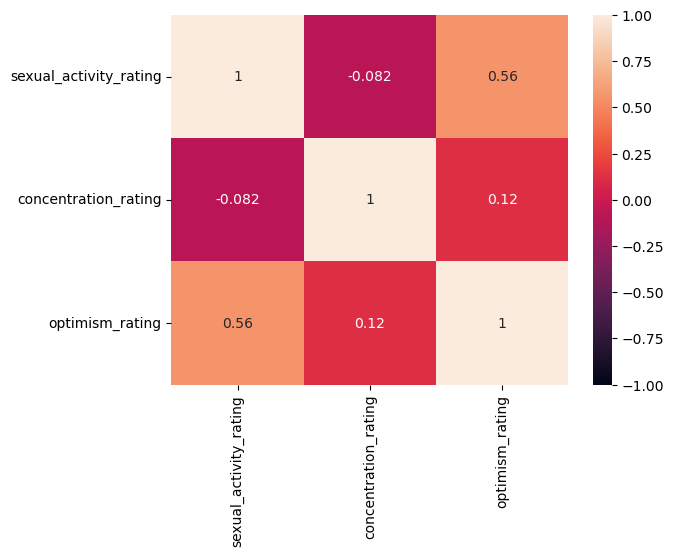

In [56]:
rating_corr = data[rating_cols].corr()
sns.heatmap(rating_corr, annot=True, vmin=-1, vmax=1)

<Axes: >

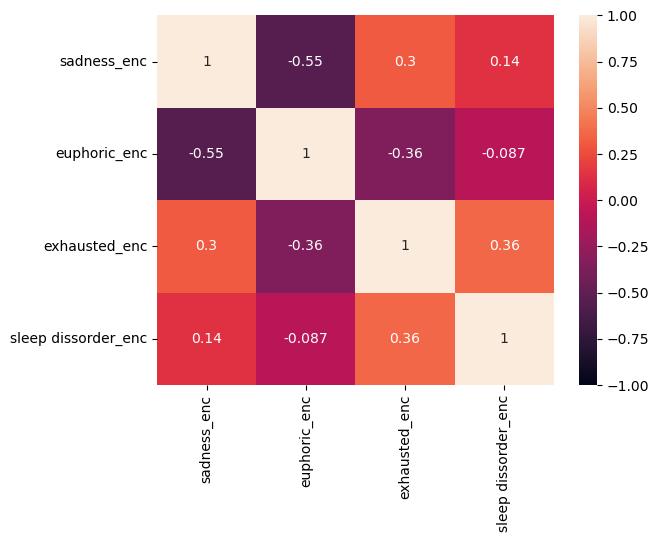

In [57]:
level_corr = data[level_cols].corr()
sns.heatmap(level_corr, annot=True, vmin=-1, vmax=1)

<Axes: >

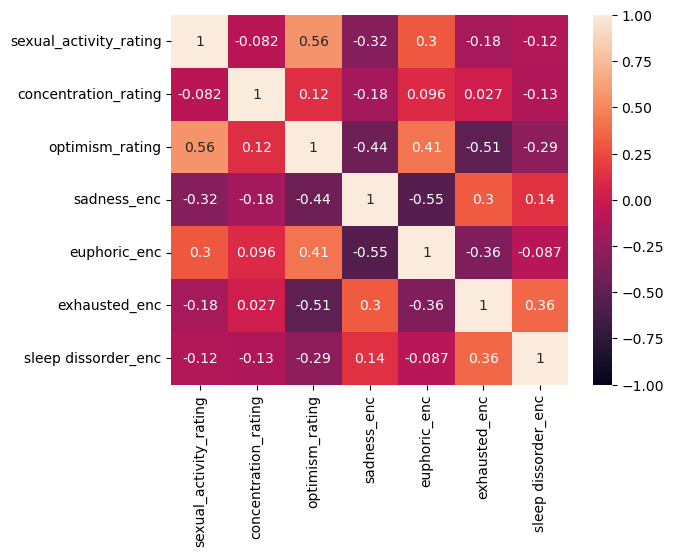

In [58]:
corr_matrix = data[rating_cols+level_cols].corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

### Scatter

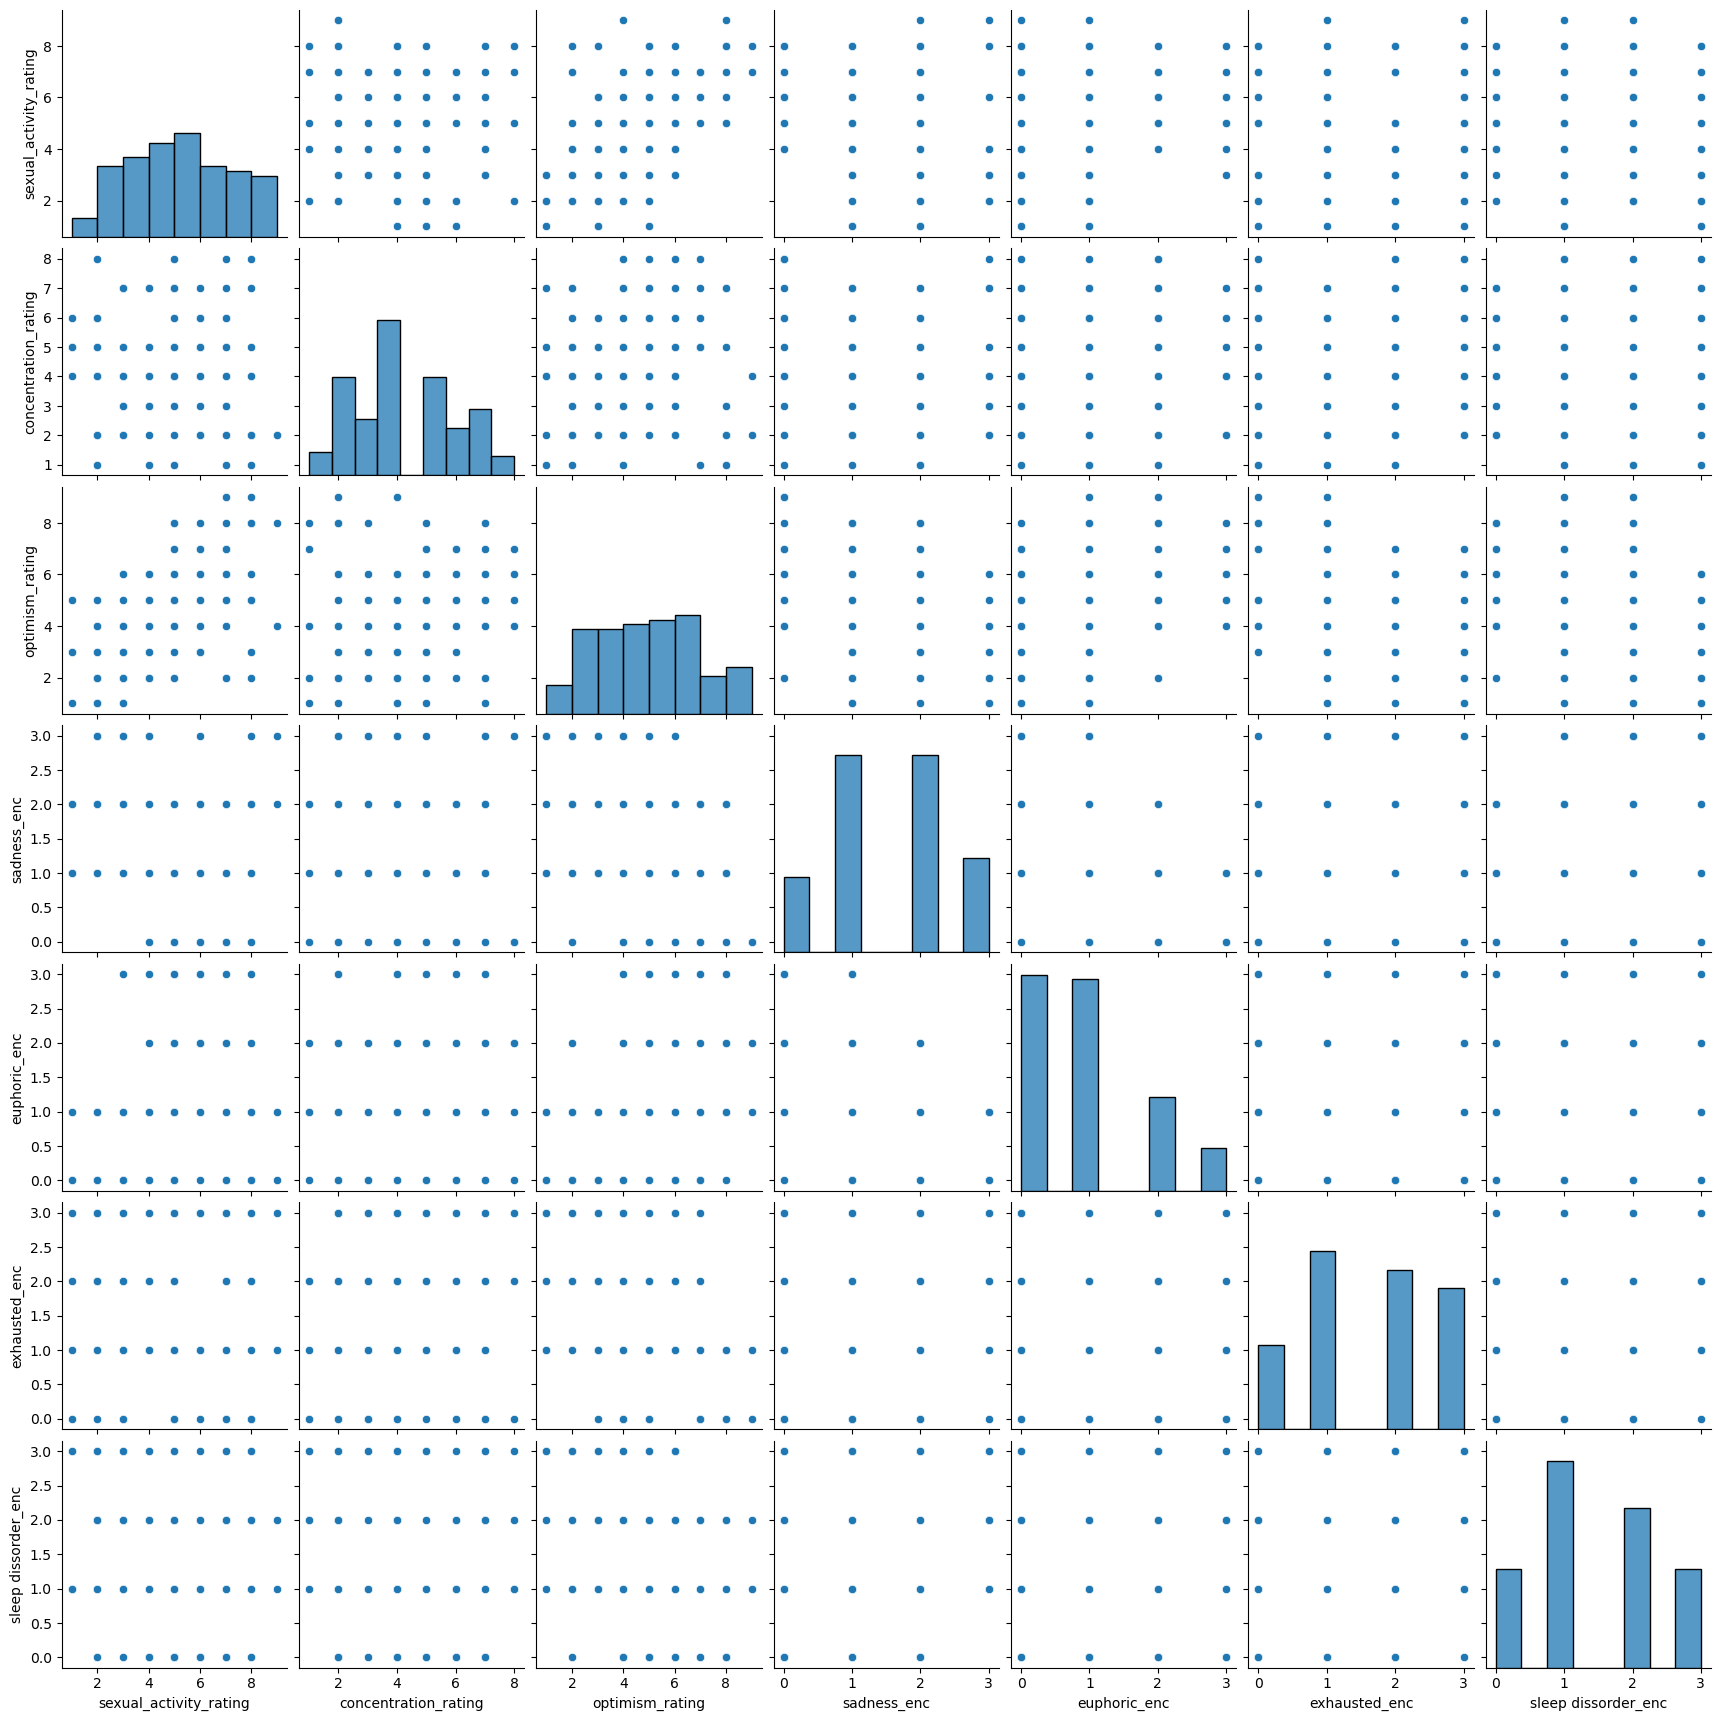

In [67]:
sns.pairplot(data[rating_cols+level_cols])